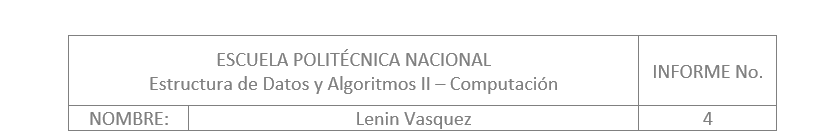
# Grafos: BFS #
## 1. OBJETIVOS

### 1. Diseñar y programar soluciones en Python que apliquen funciones, listas, diccionarios, bucles y decisiones para problemas cotidianos (TO-DOs y pagos).


### 2. Modelar grafos dirigidos mediante listas de adyacencia y aplicar el algoritmo BFS.


### 3. Verificar alcanzabilidad (existencia de camino) y obtener ruta más corta en grafos no ponderados.


### 4. Construir y presentar el árbol BFS (aristas del árbol y niveles), interpretando correctamente la figura dada.


### 5. Analizar resultados: supuestos tomados del grafo, casos borde y complejidad temporal O(V+E) y espacial O(V) de BFS.


### 6. Documentar con capturas de ejecución en JupyterLab y conclusiones claras sobre la utilidad de BFS en búsqueda por niveles y rutas mínimas.

## Introduccion ##

### aplicar conceptos fundamentales de programación estructurada y de teoría de grafos mediante el desarrollo de ejercicios prácticos en Python. En la primera parte, se diseñan programas que hacen uso de estructuras de datos como listas y diccionarios, junto con estructuras de control de flujo, para resolver problemas cotidianos: la gestión de tareas pendientes y el registro de pagos mensuales en una empresa. En la segunda parte, se implementa el algoritmo de búsqueda en anchura sobre grafos dirigidos, con el fin de determinar la existencia de caminos, rutas más cortas y la construcción del árbol BFS correspondiente.
### El algoritmo BFS constituye una de las herramientas más importantes en el análisis de redes y estructuras de datos, ya que permite recorrer un grafo nivel por nivel, garantizando la obtención del camino más corto en grafos no ponderados. Su implementación práctica refuerza el entendimiento de conceptos como adyacencia, conectividad y recorridos sistemáticos en grafos.

### 3. PROBLEMAS PLANTEADOS Y SOLUCIÓN (Desarrollo)
### 3.1 Descripción o planteamiento del Problema 
### Te estás preparando para el fin del semestre y haces una lista de tipo “TO-DOs” para preparar todas las actividades, como por ejemplo: “Proyecto Final EDA2”, “Examen SO”, “Examen ArquitecturaC”, “Presentación Informe BDD Distribuidas”, etc. Has un programa que barra la lista de actividad en actividad y tú puedas indicar si está listo o no (check o no). Si hay una actividad con “check”, que ya no se muestre la próxima vez que revisas tu lista de TO-DOs

In [7]:
import json
import os


ARCHIVO_TODO = "todo_list.json"


def cargar_actividades():
    if os.path.exists(ARCHIVO_TODO):
        with open(ARCHIVO_TODO, "r") as f:
            return json.load(f)
    return []


def guardar_actividades(actividades):
    with open(ARCHIVO_TODO, "w") as f:
        json.dump(actividades, f, indent=4)

def mostrar_actividades(actividades):
    if not actividades:
        print("\n No hay actividades pendientes. ¡Buen trabajo!")
    else:
        print("\n Lista de actividades pendientes:")
        for i, act in enumerate(actividades):
            print(f"{i+1}. {act['nombre']} {'' if act['completado'] else ''}")

def main():
    actividades = cargar_actividades()

    while True:
        mostrar_actividades([a for a in actividades if not a['completado']])

        print("\nOpciones:")
        print("1. Agregar nueva actividad")
        print("2. Marcar actividad como completada")
        print("3. Salir")
        opcion = input("Selecciona una opción: ")

        if opcion == "1":
            nombre = input("Escribe el nombre de la nueva actividad: ")
            actividades.append({"nombre": nombre, "completado": False})
            guardar_actividades(actividades)
            print(" Actividad agregada correctamente.")

        elif opcion == "2":
            pendientes = [a for a in actividades if not a['completado']]
            if not pendientes:
                print(" No hay actividades para marcar.")
                continue

            try:
                indice = int(input("Número de actividad a marcar como completada: ")) - 1
                if 0 <= indice < len(pendientes):
                    pendientes[indice]['completado'] = True
                    # Actualizar lista original
                    for act in actividades:
                        if act['nombre'] == pendientes[indice]['nombre']:
                            act['completado'] = True
                    guardar_actividades(actividades)
                    print(" Actividad marcada como completada.")
                else:
                    print("Número fuera de rango.")
            except ValueError:
                print("Por favor ingresa un número válido.")

        elif opcion == "3":
            print(" Saliendo del programa. ¡Hasta la próxima!")
            break

        else:
            print(" Opción inválida. Intenta nuevamente.")

if __name__ == "__main__":
    main()



 Lista de actividades pendientes:
1. 2 
2. 1 

Opciones:
1. Agregar nueva actividad
2. Marcar actividad como completada
3. Salir
 Actividad agregada correctamente.

 Lista de actividades pendientes:
1. 2 
2. 1 
3. Correr 

Opciones:
1. Agregar nueva actividad
2. Marcar actividad como completada
3. Salir
 Actividad agregada correctamente.

 Lista de actividades pendientes:
1. 2 
2. 1 
3. Correr 
4. saltar 

Opciones:
1. Agregar nueva actividad
2. Marcar actividad como completada
3. Salir
 Actividad marcada como completada.

 Lista de actividades pendientes:
1. 1 
2. Correr 
3. saltar 

Opciones:
1. Agregar nueva actividad
2. Marcar actividad como completada
3. Salir
 Saliendo del programa. ¡Hasta la próxima!


### Cada mes tu empresa hace pagos de salarios de los trabajadores. Puedes ingresar los elementos quemados en un diccionario {mes:pago}. Haz un programa que permita verificar en qué mes se pagó más y el valor, en qué mes se pagó menos y el valor, y finalmente el promedio de pago de salarios en el año.

In [ ]:


def main():
    pagos = {}

    print("=== REGISTRO DE PAGOS MENSUALES ===")
    n = int(input("¿Cuántos meses deseas registrar? "))

    for i in range(n):
        mes = input(f"Ingrese el nombre del mes #{i+1}: ").capitalize()
        try:
            pago = float(input(f"Ingrese el monto pagado en {mes}: "))
            pagos[mes] = pago
        except ValueError:
            print(" Monto inválido. Se ignorará este registro.")

    print("\n=== RESULTADOS ===")
    if pagos:
        # Encontrar máximo, mínimo y promedio
        mes_mayor = max(pagos, key=pagos.get)
        mes_menor = min(pagos, key=pagos.get)
        promedio = sum(pagos.values()) / len(pagos)

        print(f" Mes con mayor pago: {mes_mayor} → ${pagos[mes_mayor]:,.2f}")
        print(f" Mes con menor pago: {mes_menor} → ${pagos[mes_menor]:,.2f}")
        print(f" Promedio anual de pago: ${promedio:,.2f}")
    else:
        print("No se registraron pagos.")

if __name__ == "__main__":
    main()


=== REGISTRO DE PAGOS MENSUALES ===

=== RESULTADOS ===
📈 Mes con mayor pago: Octubre → $6,556.00
📉 Mes con menor pago: Mayo → $66.00
💰 Promedio anual de pago: $1,639.30


### Dado el siguiente grafo, implemente el algortimo BSF donde se responda a las preguntas: 

### a. Existe un path desde 1 hasta 6?  

### b. Cuál es la ruta más corta?

### c. Dibuje el árbol BFS

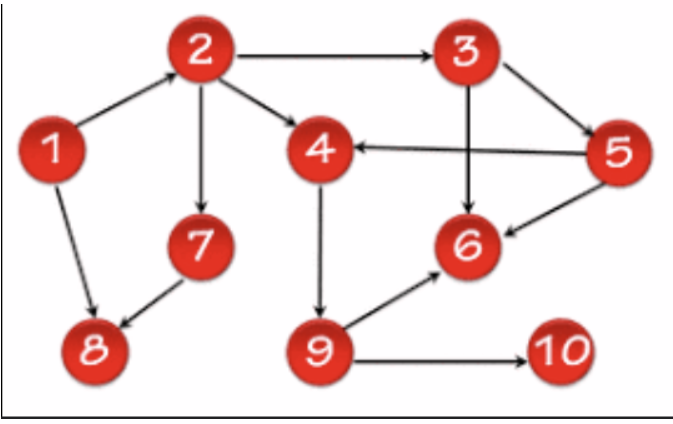

In [ ]:
from collections import deque, defaultdict

# Grafo dirigido según la imagen
G = {
    1: [2, 8],
    2: [3, 4, 7],
    3: [5, 6],
    4: [9],
    5: [4, 6],
    6: [],
    7: [8],
    8: [],
    9: [6, 10],
    10: []
}

def bfs_tree_and_shortest_path(G, s, t):
    parent = {s: None}
    dist = {s: 0}
    q = deque([s])

    while q:
        u = q.popleft()
        for v in G.get(u, []):
            if v not in parent:               
                parent[v] = u
                dist[v] = dist[u] + 1
                q.append(v)


    path = []
    if t in parent:
        cur = t
        while cur is not None:
            path.append(cur)
            cur = parent[cur]
        path.reverse()

    return parent, dist, path

if __name__ == "__main__":
    s, t = 1, 6
    parent, dist, path = bfs_tree_and_shortest_path(G, s, t)

    print("¿Existe path de 1 a 6?:", "Sí" if path else "No")
    if path:
        print("Ruta más corta:", " -> ".join(map(str, path)), f"(longitud = {len(path)-1})")

    # Imprimir aristas del árbol BFS
    tree_edges = [(v, p) for v, p in parent.items() if p is not None]
    tree_edges.sort(key=lambda e: (e[1], e[0]))  # orden agradable
    print("Aristas del árbol BFS:")
    for v, p in tree_edges:
        print(f"{p} -> {v}")


¿Existe path de 1 a 6?: Sí
Ruta más corta: 1 -> 2 -> 3 -> 6 (longitud = 3)
Aristas del árbol BFS:
1 -> 2
1 -> 8
2 -> 3
2 -> 4
2 -> 7
3 -> 5
3 -> 6
4 -> 9
9 -> 10


### 3. Genera el árbol BFS (BFS Tree) para el siguiente grafo G, sabiendo que el nodo de inicio es 0. Ese sería el componente conectado que contiene al nodo 0. Implementa el algoritmo BFS y usa las estructuras auxiliares necesarias.

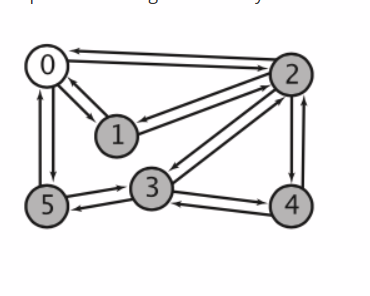

In [ ]:
from collections import deque


G = {
    0: [1, 2, 5],
    1: [0, 2, 3],
    2: [0, 1, 3, 4],
    3: [1, 2, 4, 5],
    4: [2, 3],
    5: [0, 3]
}

def bfs_tree(G, start):
    visitados = set()
    padre = {start: None}      
    cola = deque([start])      

    while cola:
        u = cola.popleft()
        visitados.add(u)
        for v in G[u]:
            if v not in visitados and v not in cola:
                padre[v] = u
                cola.append(v)
    return padre


if __name__ == "__main__":
    inicio = 0
    padre = bfs_tree(G, inicio)

    print("Árbol BFS (padres):")
    for nodo, p in padre.items():
        print(f"{nodo} <- {p}")


Árbol BFS (padres):
0 <- None
1 <- 0
2 <- 0
5 <- 0
3 <- 1
4 <- 2
